<a href="https://colab.research.google.com/github/uervitonsantos/Atividade_Analise_Bayeseana_Com_RSTAN/blob/main/trabalho_de_estatistivca_bayesiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade de analise inferencial Bayseana com RStan aplicado em um conjunto de dados de confiabilidade de motores

Estimating Generalized Linear Models for Count Data with rstanarm: https://mc-stan.org/rstanarm/articles/count.html

Poisson regression in Stan: https://rpubs.com/kaz_yos/stan-pois1

Negative Binomial Distribution: https://rpubs.com/mpfoley73/458738

Estatística Bayesiana com R e Stan. prof. José Eduardo Storopoli: https://www.youtube.com/watch?v=m_kJwaL2KHQ&list=PLpTXaEnTpmwNwBwwwLTDmCLekoUPtc0cP&index=10

Aula Inferência Bayesiana com prof. Gustavo Ferreira: https://www.youtube.com/watch?v=YKZ1euMRsbs&list=PL5nbzsxqG2FPrVmqbLafXqOrE3djThquN

https://study.sagepub.com/sites/default/files/chapter16.pdf

Beginners Exercise: Bayesian computation with Stan and Farmer Jöns: https://www.sumsar.net/files/posts/2017-01-15-bayesian-computation-with-stan-and-farmer-jons/stan_exercise.html

Stan: https://mc-stan.org/

Plotting Bayesian models: http://mc-stan.org/bayesplot/

How to Use the rstanarm Package: https://mc-stan.org/rstanarm/articles/rstanarm.html

Count Outcome Models with Stan: https://rpubs.com/kaz_yos/stan_count2

Simulate and fit negative binomial GLMs in Stan: http://rstudio-pubs-static.s3.amazonaws.com/34099_2e35c3966ef548c2918d5b6c2146bfd1.html

In [ ]:
!pip install rpy2==3.5.4

In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("rstanarm")

In [ ]:
%%R
library(ggplot2)
library(dplyr)
library(bayesplot)
library(rstanarm)
theme_set(bayesplot::theme_default())

In [5]:
%%R
df <- read.csv("/content/drive/MyDrive/Colab Notebooks/DateSet/Motor_Bomba.csv", header = TRUE, sep = ";", dec = ",")

In [6]:
%%R
str(df)

'data.frame':	363 obs. of  22 variables:
 $ Ano                            : int  2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ Dia                            : int  2 3 4 5 6 7 8 9 10 11 ...
 $ FALHA                          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Temp..Estator.Fase.U           : int  38 38 38 38 38 38 38 38 38 38 ...
 $ Temp..Estator.Fase.V           : int  40 40 40 40 40 40 40 40 40 40 ...
 $ Temp..Estator.Fase.WA          : int  37 37 37 37 37 37 37 36 36 36 ...
 $ Temp..Estator.Fase.WB          : int  39 39 39 39 39 39 39 39 39 39 ...
 $ Vibração.Bomba.LA              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Vazão.Bomba                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Corrente                       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pressão.Desc.                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pressão.Suc                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Posição.FCV                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Temp..externo.mancal.escora.LNA: int  2

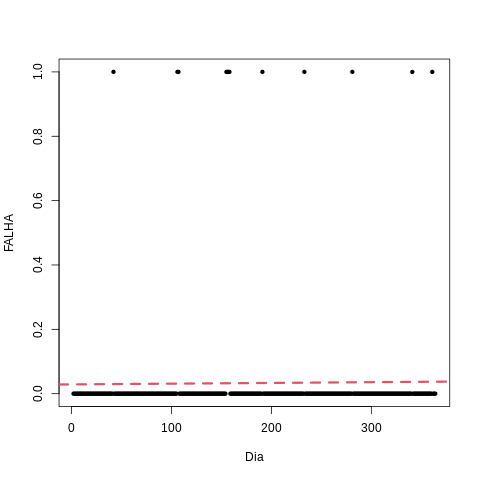

In [7]:
%%R
lm1 <- lm(FALHA ~ Dia, data = df)
plot(FALHA ~ Dia, pch = 20, data = df)
abline(lm1, col = 2, lty = 2, lw = 3)

In [8]:
%%R
sd(df$FALHA) %>% log

[1] -1.720177


In [9]:
%%R
sd(df$Dia) %>% log

[1] 4.653325


In [10]:
%%R
sd(df$Temp..mancal.LA.motor) %>% log

[1] 2.052306


In [11]:
%%R
# Estimate Bayesian version with stan_glm
stan_glm1 <- stan_glm(formula = FALHA ~ Dia + Temp..Estator.Fase.U +                       
  Temp..Estator.Fase.V +                       
  Temp..Estator.Fase.WA +                      
  Temp..Estator.Fase.WB +                      
  Vibração.Bomba.LA +                          
  Vazão.Bomba +                              
  Corrente +                                   
  Pressão.Desc. +                              
  Pressão.Suc +                                
  #Posição.FCV +                               
  Temp..externo.mancal.escora.LNA +            
  Temp..interno.mancal.escora.LNA +            
  Pressão.Selo.LA +                            
  Pressão.Selo.LNA +                           
  Temp..mancal.LA.bomba +                      
  Temp..mancal.LA.motor +                      
  Temp..mancal.LNA.bomba +                     
  Temp..mancal.LNA.motor +                     
  Temp..Oleo.ULF,
                      offset(log(Dia)),
                      data = df,  
                      family = poisson, 
                    #   prior = normal(c(0, 0, 0), c(0.1, 5, 5)),
                    #   prior_intercept = normal(0, 2.5)
                    )
summary(stan_glm1)


SAMPLING FOR MODEL 'count' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000181 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.81 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 21.4574 seconds (Warm-up)
Chain 1:                24.4701 seconds (Sampling)
Chain 1:                45.9

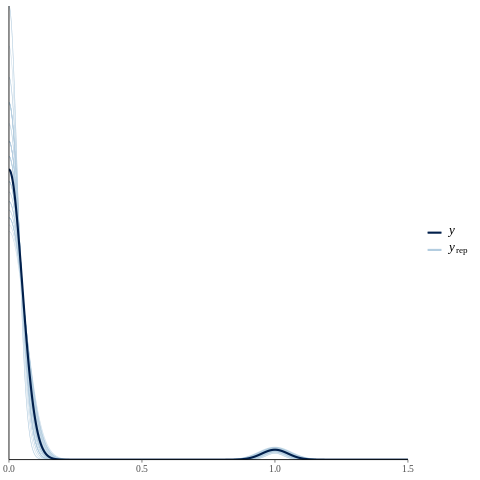

In [12]:
%%R
pp_check(stan_glm1, ndraws = 50) + xlim(0, 1.5)

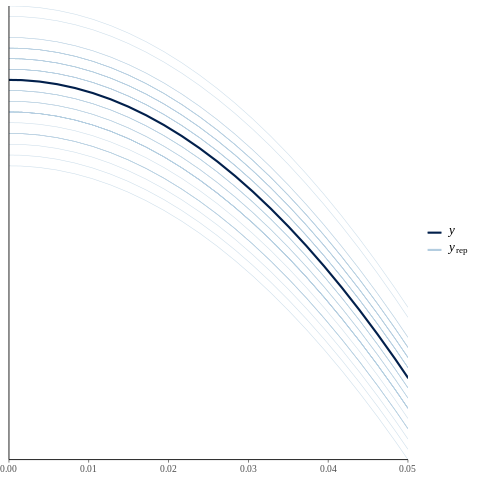

In [13]:
%%R
pp_check(stan_glm1, ndraws = 50) + xlim(0, 0.05)

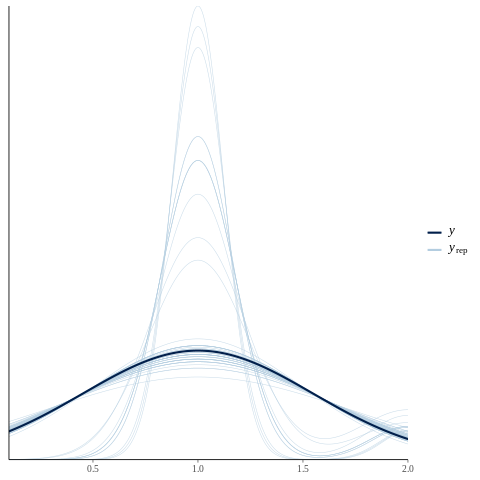

In [14]:
%%R
pp_check(stan_glm1, ndraws = 50) + xlim(0.1, 2)

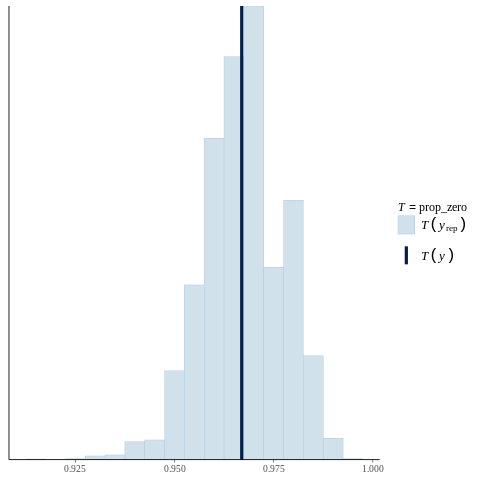

In [15]:
%%R
prop_zero <- function(y) mean(y == 0)
(prop_zero_test1 <- pp_check(stan_glm1, plotfun = "stat", stat = "prop_zero", binwidth = .005))

In [16]:
%%R
stan_glm2 <- update(stan_glm1, family = neg_binomial_2)


SAMPLING FOR MODEL 'count' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000323 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 3.23 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 45.7766 seconds (Warm-up)
Chain 1:                33.8387 seconds (Sampling)
Chain 1:                79.6

In [17]:
%%R
prop_zero_test2 <- pp_check(stan_glm2, plotfun = "stat", stat = "prop_zero", binwidth = 0.01)

In [ ]:
%%R
install.packages("ggpubr")

In [19]:
%%R
library(ggpubr)

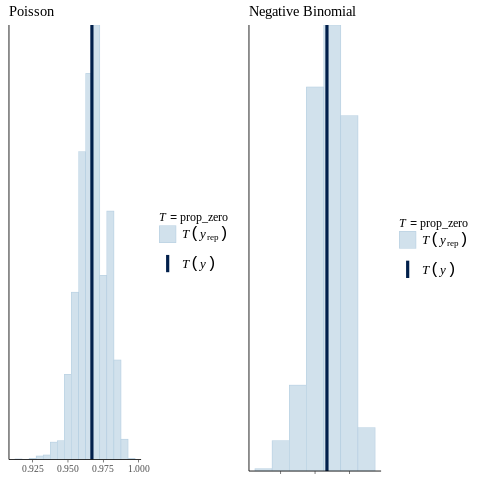

In [20]:
%%R
# Show graphs for Poisson and negative binomial side by side
t1 <- prop_zero_test1 + ggtitle("Poisson")
t2<- prop_zero_test2 + ggtitle("Negative Binomial")

ggarrange(t1, t2 + rremove("x.text"), 
          ncol = 2, nrow = 1)
             